## Import Data

In [4]:
data_path = "C:\\Users\\colem\\Desktop\\Senior\\BigData\\GE_BigData_Project\\GE_Outcomes_V2\\Data\\Compliance\\GE_Compliance.csv"

import pandas as pd

dataframe = pd.DataFrame(pd.read_csv(data_path))

dataframe


,course_id,Assignments,Students,outcome_1,outcome_2,teacher_#1_name,teacher_#1_email,semester,course,section,college,Compliance,Reason
0,FA2022_ARDE2020_01,0,36.0,HU1,NaN,Jamie Tucker,JTucker@nnu.edu,FA2022,ARDE2020,01,College of Arts and Humanities,Naughty,Nothing Attached in Canvas
1,FA2022_ARDE3250_01,0,24.0,HU1,NaN,Jamie Tucker,JTucker@nnu.edu,FA2022,ARDE3250,01,College of Arts and Humanities,Naughty,Nothing Attached in Canvas
2,FA2022_ARDE3340_01,0,16.0,HU1,NaN,R Kinsman,PKinsman@nnu.edu,FA2022,ARDE3340,01,College of Arts and Humanities,Naughty,Nothing Attached in Canvas
3,FA2022_BIBL1100_01,0,43.0,CF1,NaN,Mary Schmitt,MSchmitt@nnu.edu,FA2022,BIBL1100,01,College of Theology and Christian Ministry,Naughty,Nothing Attached in Canvas
4,FA2022_BIBL1100_02,0,43.0,CF1,NaN,Grant Miller,GTMiller@nnu.edu,FA2022,BIBL1100,02,College of Theology and Christian Ministry,Naughty,Nothing Attached in Canvas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,SP2022_THEO3630_01,0,29.0,CF3,HU3,Christina Smerick,CSmerick@nnu.edu,SP2022,THEO3630,01,College of Theology and Christian Ministry,Naughty,Nothing Attached in Canvas
287,SP2022_THEO3710_01,0,23.0,CF3,NaN,Diane Leclerc,DKLeclerc@nnu.edu,SP2022,THEO3710,01,College of Theology and Christian Ministry,Naughty,Nothing Attached in Canvas
288,SP2022_THEO3730_01,0,25.0,CF3,HU3,Joe Gorman,JTGorman@nnu.edu,SP2022,THEO3730,01,College of Theology and Christian Ministry,Naughty,Nothing Attached in Canvas
289,SP2022_THEO4900_01,12,13.0,HU2,NaN,Diane Leclerc,DKLeclerc@nnu.edu,SP2022,THEO4900,01,College of Theology and Christian Ministry,Nice,Compliant


## Plot Data to look for patterns

<AxesSubplot:title={'center':'Average Number of Students per Course based on College'}, xlabel='college'>

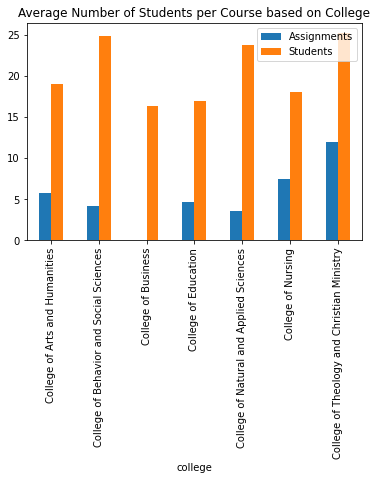

In [6]:
students_table = dataframe.pivot_table(index='college',values=['Students', 'Assignments'])
students_table.plot(kind='bar', title='Average Number of Students per Course based on College')

<AxesSubplot:title={'center':'Average NUmber of Students based on Compliancy in College'}, xlabel='college'>

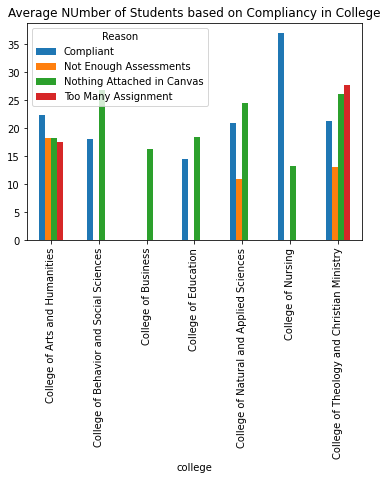

In [29]:
compliance_table = dataframe.pivot_table(index=['college'],columns=['Reason'], values='Students')
compliance_table.plot(kind='bar', title='Average NUmber of Students based on Compliancy in College')

## Use Sci-Kit Learn to Make Predictions

In [5]:
from sklearn.utils import shuffle

## Randomized all of the non-null entries in the table
randomized = shuffle(dataframe.loc[dataframe['outcome_1'].notnull()])
count = randomized['Students'].count()
training_size = 200

## Randomly select values for training data
train_students = randomized['Students'].head(training_size).values
train_colleges = randomized['college'].head(training_size).values
train_results = randomized['Reason'].head(training_size).values

print(train_students)
print(train_colleges)
print(train_results)



## Randomly select values for training data
test_students = randomized['Students'].tail(count - training_size).values
test_colleges = randomized['college'].tail(count - training_size).values
test_results = randomized['Reason'].tail(count - training_size).values

print(test_students)
print(test_colleges)

[24.  3. 17. 37. 18. 15.  8. 26. 22. 25.  2. 11. 44. 11. 25. 10. 43. 34.
 15. 19. 28. 15.  9. 11. 30. 50. 17. 24. 11. 27. 19.  9.  4. 17. 46. 24.
 15. 25. 23. 25. 23. 25. 21. 15. 23. 14. 11. 24. 11.  6. 24. 15. 32. 39.
  3. 37. 31. 41. 84. 24. 18. 42.  4. 39. 13. 12. 19. 18.  9. 40. 44. 47.
 18. 33. 11. 16. 22. 20.  7. 20. 23. 20.  7. 19. 26. 34. 24. 24. 34. 24.
  3. 62. 16. 21. 18. 12. 41. 23.  5. 37.  7. 42.  6. 18. 24.  9. 19. 42.
 35. 18. 24. 23. 45. 13.  4. 26.  7. 13.  9. 11.  8. 39. 22. 16. 15. 14.
  4. 41. 23. 15. 31. 18. 54. 13. 24. 46.  3. 13. 56. 16. 65. 20.  3. 10.
  3. 43. 29.  7. 23. 12. 24.  7. 25.  3.  9. 34. 21. 21. 19. 14. 19. 34.
 32. 45. 13. 19. 17. 16.  7.  7. 51. 29. 11.  9. 27. 29. 13.  7.  7. 20.
 22. 19. 17. 28. 23.  2. 13. 28. 59. 15. 49. 16. 27. 16.  1. 38. 20. 11.
 37. 32.]
['College of Arts and Humanities' 'College of Arts and Humanities'
 'College of Natural and Applied Sciences' 'College of Education'
 'College of Arts and Humanities' 'College of Arts and

In [6]:
## We need to transform colleges training data to numberic data
from sklearn import preprocessing
training_encoder = preprocessing.LabelEncoder()
testing_encoder = preprocessing.LabelEncoder()
college_training_labels = training_encoder.fit_transform(train_colleges)
college_testing_labels = testing_encoder.fit_transform(test_colleges)

training_data = []

for index, label in enumerate(college_training_labels):
    current = [college_training_labels[index], train_students[index]]
    training_data.append(current)


testing_data = []
for index, label in enumerate(college_testing_labels):
    current = [college_testing_labels[index], test_students[index]]
    testing_data.append(current)

print("Training Data")
print(training_data)

print("\n\nTesting Data")
print(testing_data)

Training Data
[[0, 24.0], [0, 3.0], [4, 17.0], [3, 37.0], [0, 18.0], [0, 15.0], [0, 8.0], [6, 26.0], [0, 22.0], [4, 25.0], [4, 2.0], [0, 11.0], [4, 44.0], [0, 11.0], [0, 25.0], [4, 10.0], [0, 43.0], [6, 34.0], [0, 15.0], [0, 19.0], [0, 28.0], [0, 15.0], [0, 9.0], [4, 11.0], [2, 30.0], [0, 50.0], [0, 17.0], [0, 24.0], [4, 11.0], [2, 27.0], [0, 19.0], [4, 9.0], [6, 4.0], [0, 17.0], [0, 46.0], [4, 24.0], [4, 15.0], [0, 25.0], [0, 23.0], [4, 25.0], [0, 23.0], [6, 25.0], [4, 21.0], [4, 15.0], [0, 23.0], [0, 14.0], [0, 11.0], [4, 24.0], [4, 11.0], [0, 6.0], [4, 24.0], [0, 15.0], [6, 32.0], [1, 39.0], [5, 3.0], [5, 37.0], [0, 31.0], [3, 41.0], [1, 84.0], [4, 24.0], [4, 18.0], [4, 42.0], [3, 4.0], [6, 39.0], [0, 13.0], [6, 12.0], [4, 19.0], [0, 18.0], [1, 9.0], [6, 40.0], [6, 44.0], [4, 47.0], [6, 18.0], [4, 33.0], [0, 11.0], [0, 16.0], [4, 22.0], [4, 20.0], [6, 7.0], [6, 20.0], [4, 23.0], [0, 20.0], [4, 7.0], [0, 19.0], [2, 26.0], [1, 34.0], [0, 24.0], [6, 24.0], [4, 34.0], [4, 24.0], [4, 3.0

In [7]:
from sklearn import tree
myTree = tree.DecisionTreeClassifier()
myTree = myTree.fit(training_data, train_results)

[Text(0.5067567567567568, 0.9642857142857143, 'X[0] <= 0.5\ngini = 0.379\nsamples = 200\nvalue = [32, 7, 154, 7]'),
 Text(0.2072072072072072, 0.8928571428571429, 'X[1] <= 31.5\ngini = 0.461\nsamples = 77\nvalue = [16, 4, 54, 3]'),
 Text(0.15315315315315314, 0.8214285714285714, 'X[1] <= 22.5\ngini = 0.441\nsamples = 72\nvalue = [13, 4, 52, 3]'),
 Text(0.0990990990990991, 0.75, 'X[1] <= 20.5\ngini = 0.496\nsamples = 52\nvalue = [11, 3, 35, 3]'),
 Text(0.08108108108108109, 0.6785714285714286, 'X[1] <= 3.5\ngini = 0.47\nsamples = 50\nvalue = [9, 3, 35, 3]'),
 Text(0.06306306306306306, 0.6071428571428571, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]'),
 Text(0.0990990990990991, 0.6071428571428571, 'X[1] <= 5.5\ngini = 0.492\nsamples = 47\nvalue = [9, 3, 32, 3]'),
 Text(0.08108108108108109, 0.5357142857142857, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(0.11711711711711711, 0.5357142857142857, 'X[1] <= 10.0\ngini = 0.461\nsamples = 45\nvalue = [7, 3, 32, 3]'),
 Text(0.099099099

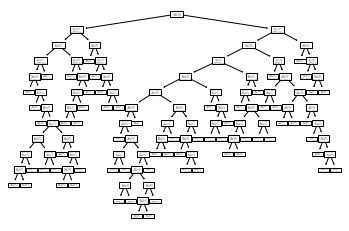

In [8]:
tree.plot_tree(myTree)

In [19]:
for index, data in enumerate(testing_data):
    ## Predict each piece of testing data
    current = [testing_data[index]]
    prediction = myTree.predict(current)

    ## Determine what inputs led to the prediction
    current_student_count = test_students[index]
    current_college = test_colleges[index]


    print('A course in the ' + current_college + ' with ' + str(int(current_student_count)) + ' students is predicted to result in '  + prediction)
    

['A course in the College of Arts and Humanities with 35 students is predicted to result in Nothing Attached in Canvas']
['A course in the College of Natural and Applied Sciences with 24 students is predicted to result in Nothing Attached in Canvas']
['A course in the College of Business with 28 students is predicted to result in Nothing Attached in Canvas']
['A course in the College of Arts and Humanities with 6 students is predicted to result in Nothing Attached in Canvas']
['A course in the College of Natural and Applied Sciences with 22 students is predicted to result in Compliant']
['A course in the College of Arts and Humanities with 23 students is predicted to result in Nothing Attached in Canvas']
['A course in the College of Theology and Christian Ministry with 37 students is predicted to result in Nothing Attached in Canvas']
['A course in the College of Business with 6 students is predicted to result in Nothing Attached in Canvas']
['A course in the College of Arts and Human